In [1]:
import numpy as np 
from sklearn.datasets import fetch_openml  
def fetch_mnist():     
    #Download MNIST dataset     
    X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)     
    X = X.to_numpy()     
    y = y.to_numpy()          
    # Randomly sample 7000 images     
    np.random.seed(2)     
    indices = np.random.choice(len(X), 7000, replace=False)     
    X, y = X[indices], y[indices]     
    return X, y  

X, y = fetch_mnist() 
print(X.shape, y.shape) 

(7000, 784) (7000,)


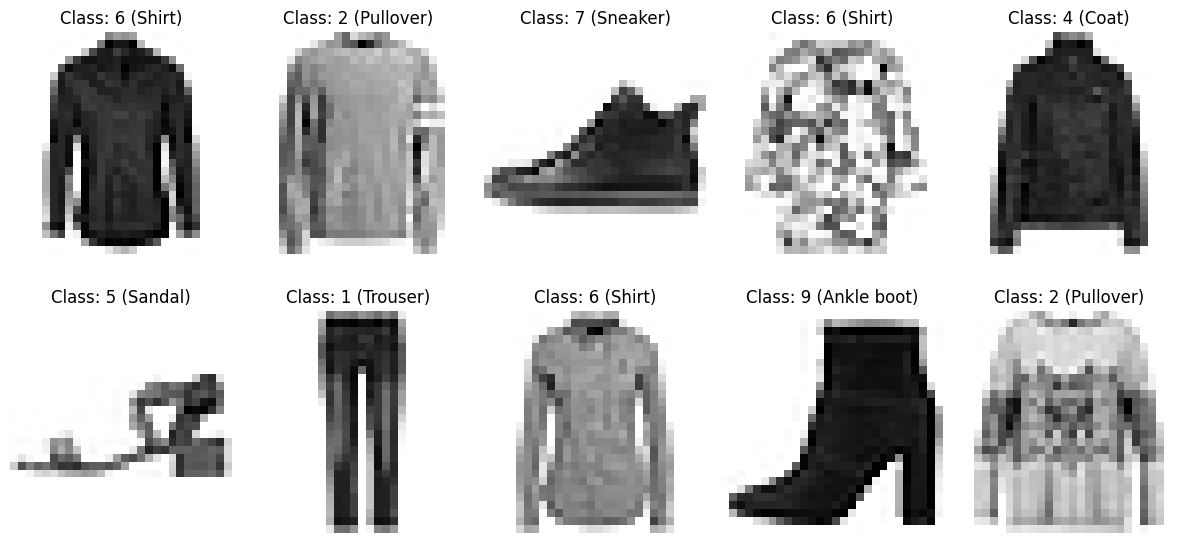

In [8]:
import matplotlib.pyplot as plt

# Class names dictionary for Fashion MNIST
idx2class = {
    '0': 'T-shirt/top', '1': 'Trouser', '2': 'Pullover', '3': 'Dress',
    '4': 'Coat', '5': 'Sandal', '6': 'Shirt', '7': 'Sneaker',
    '8': 'Bag', '9': 'Ankle boot'
}

# Select the first 10 indices
first_10_indices = np.arange(10)

# Set up the plot
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    # Extract the image and its label
    image = X[first_10_indices[i]]
    label = y[first_10_indices[i]]
    
    # Reshape the image to 28x28
    image = image.reshape(28, 28)
    
    # Get the class name
    class_name = idx2class[str(int(label))]
    
    # Plot the image
    ax.imshow(image, cmap="binary")
    ax.set_title(f"Class: {int(label)} ({class_name})")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [9]:
import numpy as np
def cross_validation_error(X, y, model, folds): 
    m = len(y) 
    indices = np.arange(m) 
    np.random.shuffle(indices) 
    fold_size = m // folds 
    train_errors = [] 
    val_errors = [] 
    for i in range(folds): 
        val_indices = indices[i * fold_size: (i + 1) * fold_size] 
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]]) 
        X_train, y_train = X[train_indices], y[train_indices] 
        X_val, y_val = X[val_indices], y[val_indices]
        model.fit(X_train, y_train) 
        train_accuracy = np.mean(model.predict(X_train) == y_train) 
        val_accuracy = np.mean(model.predict(X_val) == y_val) 
        train_errors.append(1 - train_accuracy) 
        val_errors.append(1 - val_accuracy) 
    average_train_error = np.mean(train_errors) 
    average_val_error = np.mean(val_errors) 
    return average_train_error, average_val_error

In [13]:
from sklearn.datasets import fetch_openml
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Function to evaluate SVM models
def SVM_results(X_train, y_train, X_test, y_test):
    results = {}

    # Linear kernel with default C
    model_name = 'SVM_linear'
    model = SVC(kernel='linear', C=1)
    avg_train_error, avg_val_error = cross_validation_error(X_train, y_train, model, folds=4)
    model.fit(X_train, y_train)
    test_error = 1 - accuracy_score(y_test, model.predict(X_test))
    results[model_name] = (avg_train_error, avg_val_error, test_error)

    # Polynomial kernel with different degrees
    degrees = [2, 4, 6, 8]
    for d in degrees:
        model_name = f'SVM_poly_{d}'
        model = SVC(kernel='poly', degree=d, C=1)
        avg_train_error, avg_val_error = cross_validation_error(X_train, y_train, model, folds=4)
        model.fit(X_train, y_train)
        test_error = 1 - accuracy_score(y_test, model.predict(X_test))
        results[model_name] = (avg_train_error, avg_val_error, test_error)

    # RBF kernel with different gamma values
    gammas = [0.001, 0.01, 0.1, 1.0, 10]
    for gamma in gammas:
        model_name = f'SVM_rbf_{gamma}'
        model = SVC(kernel='rbf', gamma=gamma, C=1)
        avg_train_error, avg_val_error = cross_validation_error(X_train, y_train, model, folds=4)
        model.fit(X_train, y_train)
        test_error = 1 - accuracy_score(y_test, model.predict(X_test))
        results[model_name] = (avg_train_error, avg_val_error, test_error)

    return results

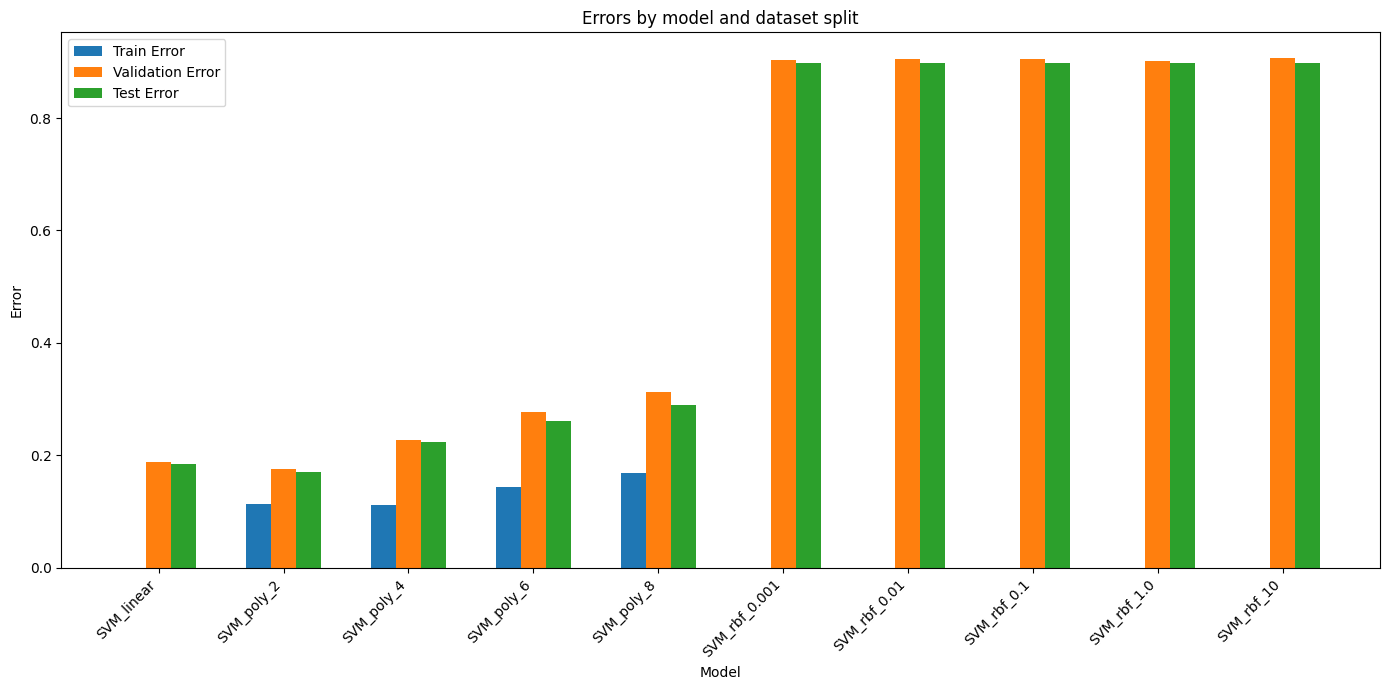

SVM_linear: train_error=0.0000, val_error=0.1885, test_error=0.1846
SVM_poly_2: train_error=0.1141, val_error=0.1753, test_error=0.1709
SVM_poly_4: train_error=0.1119, val_error=0.2269, test_error=0.2229
SVM_poly_6: train_error=0.1433, val_error=0.2771, test_error=0.2611
SVM_poly_8: train_error=0.1692, val_error=0.3117, test_error=0.2897
SVM_rbf_0.001: train_error=0.0000, val_error=0.9032, test_error=0.8977
SVM_rbf_0.01: train_error=0.0000, val_error=0.9053, test_error=0.8983
SVM_rbf_0.1: train_error=0.0000, val_error=0.9049, test_error=0.8983
SVM_rbf_1.0: train_error=0.0000, val_error=0.9021, test_error=0.8983
SVM_rbf_10: train_error=0.0000, val_error=0.9072, test_error=0.8983


In [16]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 
# Evaluate the SVM models
results = SVM_results(X_train, y_train, X_test, y_test)

# Plotting the results
def plot_results(results):
    models = list(results.keys())
    train_errors = [results[model][0] for model in models]
    val_errors = [results[model][1] for model in models]
    test_errors = [results[model][2] for model in models]

    x = np.arange(len(models))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize=(14, 7))
    rects1 = ax.bar(x - width, train_errors, width, label='Train Error')
    rects2 = ax.bar(x, val_errors, width, label='Validation Error')
    rects3 = ax.bar(x + width, test_errors, width, label='Test Error')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Model')
    ax.set_ylabel('Error')
    ax.set_title('Errors by model and dataset split')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha="right")
    ax.legend()

    fig.tight_layout()

    plt.show()

plot_results(results)
# Print the results
for model, errors in results.items():
    print(f"{model}: train_error={errors[0]:.4f}, val_error={errors[1]:.4f}, test_error={errors[2]:.4f}")